# Comentátios sobre a análise do Projeto 3

### Considerações que foram tomadas ao polgo do projeto

    Todos os gráficos foram gerados com o eixo Y em escala logarítmica
    Foram consideradas apeas as tags com frequência maior que 10
    Os dados foram obtidos entre 2017 e 2018

#### Estudando a influência das tags na quantidade de visualizações de um vídeo "em alta" no YouTube.

In [74]:
import matplotlib.pyplot as plt
from PIL import Image
#importando os DataFrames criados
%store -r dfl
%store -r you_data
%store -r trans
%store -r you_analysis
%store -r banana
%store -r you_ifn
%store -r plot1
%store -r s_3plot
%store -r new_data
%store -r s_tag
%store -r s_tagmed
%store -r mse_lr
%store -r mean_trn
%store -r mean_tst
%store -r mse_knn
%store -r mse_dtr


In [54]:
plot1 = Image.open('img/Scater plot View x Tag.png')
plot2 = Image.open('img/Scater plot View x top 3 tags.png')
plot3 = Image.open('img/Scater plot Quantidade de Views por Tags.png')
plot4 = Image.open('img/Scater plot Quantidade de Views por média das frequências das Tags.png')
plot5 = Image.open('img/Boxplots.png')

In [2]:
you_data.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,NFL|Football|offense|defense|afc|nfc|American ...,81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...


Iniciamos com um DataFrame obtido a partir de um WebScrapper que contém informações não uteis para o estudo. Restringimos as variáveis analizadas a:

    -Views
    -Title
    -Tags
    -Category_id
    
Percebemos que os dados foram minerados ao longo de um grande período, assim vídeos que estavam na seção "Em alta" por mais de um dia se repetiam, logo foram mantidas somente a utima aparição de cada vídeo.

Com o DataFrame limpo foi adicionado uma coluna para cada tag, onde se o vídeo possuia essa tag, a frequencia total (quantidade de vezes que essa tag foi utilizada no DataFrame) é adicionada a linha, caso não tenha a tag o espaço é preenchido com um 0.


In [3]:
you_analysis.tail(2) #DataFrame limpo e com as colunas de tags

,views,title,tags,category_id,tags_split,funny_freq,comedy_freq,humor_freq,comedian_freq,music_freq,...,jump_freq,animated videos_freq,animated cats_freq,national_freq,bird_freq,Kevin Hart_freq,coyote_freq,my_freq,rescue_freq,hip-hop_freq
40947,5660813,How Black Panther Should Have Ended,Black Panther|HISHE|Marvel|Infinity War|How It...,1,"[Black Panther, HISHE, Marvel, Infinity War, H...",0,515,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40948,10306119,Official Call of Duty®: Black Ops 4 — Multipla...,call of duty|cod|activision|Black Ops 4,20,"[call of duty, cod, activision, Black Ops 4]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
dfl.head()

,tags,counts
0,funny,631
1,comedy,515
2,humor,277
3,comedian,227
4,music,213


Para iniciar a anlálise separamos a quantidade de views de a frenquência da teg de maior frequência, para poder fazer uma scatter plot.


In [16]:
banana.head(1)

,views,max_freq
10,81377,141


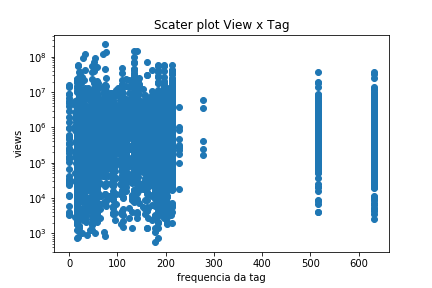

In [32]:
plot1

Contudo percebemos que não é rasoável levar em conta apenas uma tag.

In [41]:
new_data.head()

,views,top3_freq,n_tags,mean_freqs,funny,comedy,humor,music
0,81377,409,45,46.533333,0,0,0,0
1,288922,435,34,39.970588,0,0,0,0
2,34785,309,9,48.000000,0,0,0,0
3,1496225,347,22,36.090909,0,0,0,0
4,237307,69,5,19.200000,0,0,0,0


Para poder melhorar a previsão das views decidimos levar em conta mais variáves do que a frequência da tag mais frequênte. Assim geramos um dataframe com a soma das frequências das 3 tags que apareccem com maior frequêcia, o quatidade de tags atreladas a um vídeo e a média da frequência dessas tags.

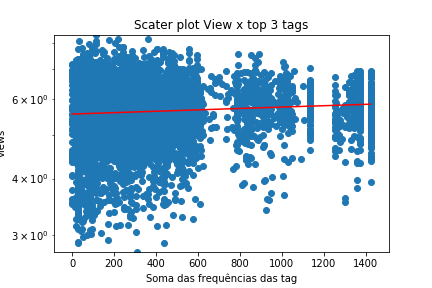

In [33]:
plot2

O primeiro gráfico gerado foi das "top 3 tags". A partir dos dados obtivemos o $R^2$ (apresentado na célula abaixo), e assim concluímos que as 3 tags mais frequêntes ainda não explicam a quantiade de views de um vídeo.

In [42]:
s_3plot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.59
Date:                Tue, 28 May 2019   Prob (F-statistic):           0.000666
Time:                        21:33:27   Log-Likelihood:            -1.0793e+05
No. Observations:                6282   AIC:                         2.159e+05
Df Residuals:                    6280   BIC:                         2.159e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.297e+06   1.33e+05     17.236      0.000    2.04e+06    2.56e+06
top3_freq   -840.4775    246.842     -3.405      0.001   -1324.372    -356.583
==============================================================================
Omnibus:                    11842.253   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24509640.276
Skew:                          14.297   Prob(JB):                         0.00
Kurtosis:                     307.664   Cond. No.                         814.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

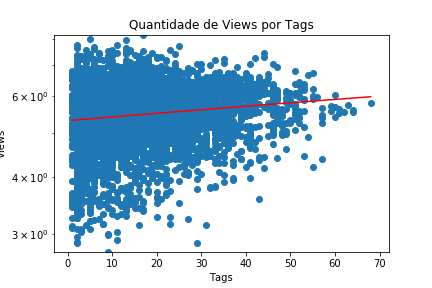

In [43]:
plot3

Continuando a análise, de acordo com as variáves estabelecidas anteriormente, visualizamos o gráfico da quantidade de tags, por views, que parece mais promissor. O $R^2$ obtido pode ser visto a baixo.

In [50]:
s_tag

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.490
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.222
Time:                        21:59:00   Log-Likelihood:                -78859.
No. Observations:                4710   AIC:                         1.577e+05
Df Residuals:                    4708   BIC:                         1.577e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.426e+06   1.13e+05     12.576      0.000     1.2e+06    1.65e+06
n_tags     -6745.9844   5526.078     -1.221      0.222   -1.76e+04    4087.715
==============================================================================
Omnibus:                     9147.349   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25405538.960
Skew:                          15.084   Prob(JB):                         0.00
Kurtosis:                     361.531   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

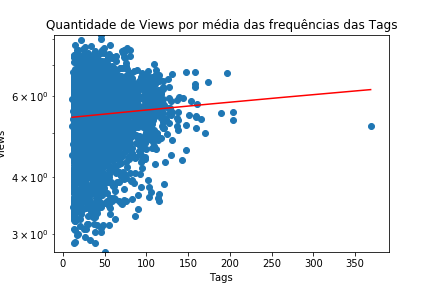

In [52]:
plot4

O mesmo foi feito para a média das frequências das tags de um vídeo.

In [56]:
s_tagmed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     23.73
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.15e-06
Time:                        22:23:24   Log-Likelihood:                -5643.0
No. Observations:                4710   AIC:                         1.129e+04
Df Residuals:                    4708   BIC:                         1.130e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3746      0.024    225.969      0.000       5.328       5.421
mean_freqs     0.0022      0.000      4.871      0.000       0.001       0.003
==============================================================================
Omnibus:                      112.590   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.001
Skew:                          -0.367   Prob(JB):                     3.22e-27
Kurtosis:                       3.288   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No final das analises percebemos que nenhum dos $R^2$ eram significantes o suficiente para descrever as views. Em um última tentativa fizemos um boxplot que compara as views dos vídeos que contém a tag com as views dos vídeos que não contém

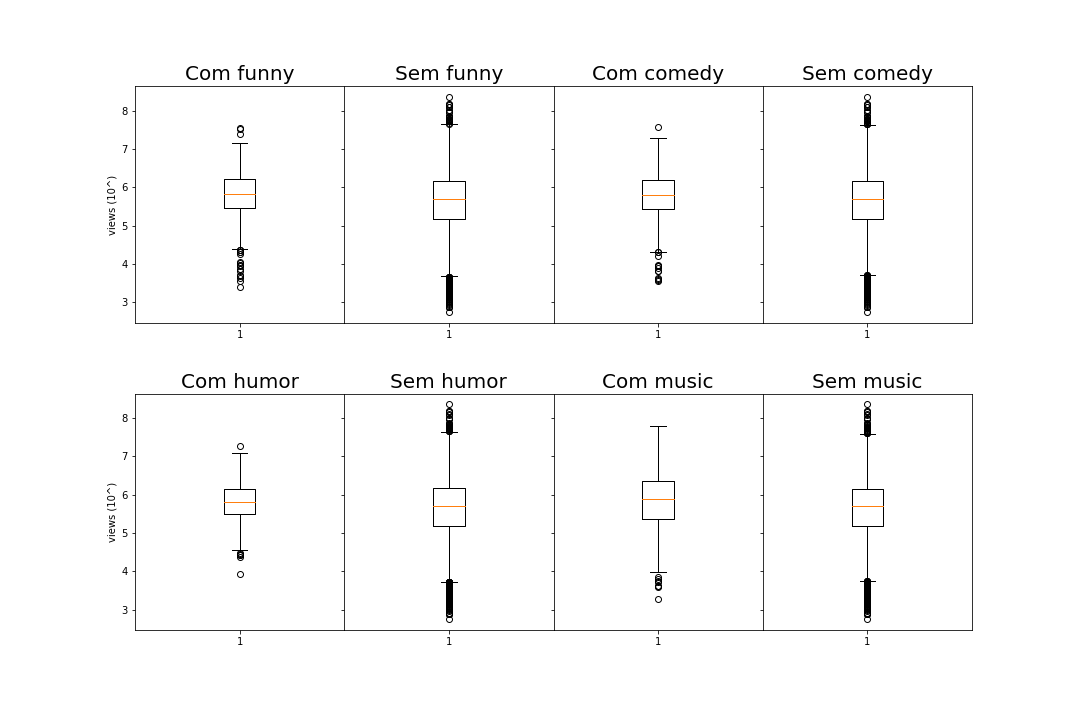

In [57]:
plot5

No boxplot é possivel perceber que não houveram mudanças drásticas entre os "Com" e "Sem", a distribuição dos quadrantes continuou parecida, mostrando dissuasão das tags.
_________________________________


MODELO DE PREDIÇÃO PELA MÉDIA

In [66]:
print("Média treinamento {0:.2f}, média teste {1:.2f}".format(mean_trn, mean_tst))

Média treinamento 1313638.77, média teste 3940555.73


Este modelo não foi capaz de prever a média, provavelmente devido a natureza instável dos dados.
_________________________________________________________________________________

MODELO DE REGRESSÃO LINEAR

In [83]:
print("média dos erros quadrados: {0:.2f}".format(mse_lr))
print("_"*90)

média dos erros quadrados: 67427161575827.04
__________________________________________________________________________________________


MODELO DOS K VIZINHOS MAIS PRÓXIMOS

In [81]:
print("média dos erros quadrados: {0:.2f}".format(mse_knn))
print("_"*90)

média dos erros quadrados: 67563413719301.63
__________________________________________________________________________________________


MODELO DE ÁRVORES DE REGRESSÃO

In [82]:
print("média dos erros quadrados: {0:.2f}".format(mse_dtr))
print("_"*90)

média dos erros quadrados: 149741633581020.56
__________________________________________________________________________________________


Em todos os casos a média dos erros quadrados resultou em um número muto alto, sendo 0 o valor ideal, podemos afirmar que Tags não influenciam na quantidade de views.